# Data Cleaning

We will take the UniMorph dataset for Georgian and:

- Extract all verb forms, excluding any other POS
- check for any latin characters and replace them with the corrext Georgian ones
- Split features (tags and lemmas) from target values (conjugated verb forms)

In [1]:
# import pandas 
import pandas as pd
import re

# Read in UniMorph
um = pd.read_csv(r"..\data\kat_UniMorph.txt", sep='\t', header=None, names=['lemma', 'form', 'tag'])

In [2]:
# check the first few rows
print(um.head())

     lemma       form                tag
0  შეუძლია   შემიძლია  V;ARGNO1S;IND;PRS
1  შეუძლია   შეგიძლია  V;ARGNO2S;IND;PRS
2  შეუძლია    შეუძლია  V;ARGNO3S;IND;PRS
3  შეუძლია  შეგვიძლია  V;ARGNO1P;IND;PRS
4  შეუძლია  შეგიძლიათ  V;ARGNO2P;IND;PRS


In [3]:
# check for duplicates
print("num of duplicates:" + str(um.duplicated().sum()))
print("num of unique words:" + str(um.form.nunique()))
print("num of unique lemmas:" + str(um.lemma.nunique()))
print("num of unique tags:" + str(um.tag.nunique()))
print("num of unique word-lemma pairs:" + str(um[['form', 'lemma']].drop_duplicates().shape[0]))
print("num of unique word-tag pairs:" + str(um[['form', 'tag']].drop_duplicates().shape[0]))

num of duplicates:0
num of unique words:75998
num of unique lemmas:3852
num of unique tags:443
num of unique word-lemma pairs:76204
num of unique word-tag pairs:91951


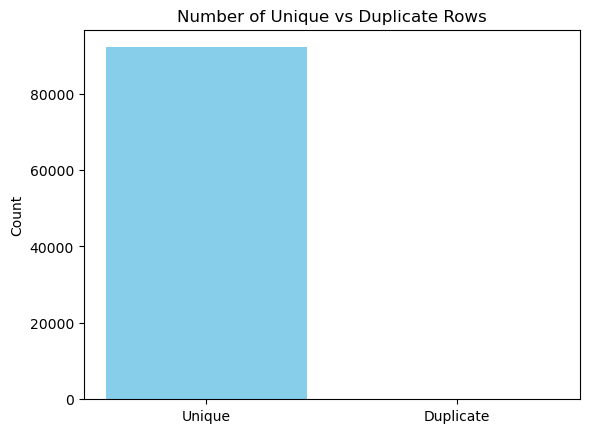

In [4]:
# Visualize the number of duplicate and unique rows in the dataframe
import matplotlib.pyplot as plt

num_duplicates = um.duplicated().sum()
num_unique = len(um) - num_duplicates

plt.bar(['Unique', 'Duplicate'], [num_unique, num_duplicates], color=['skyblue', 'salmon'])
plt.title('Number of Unique vs Duplicate Rows')
plt.ylabel('Count')
plt.show()

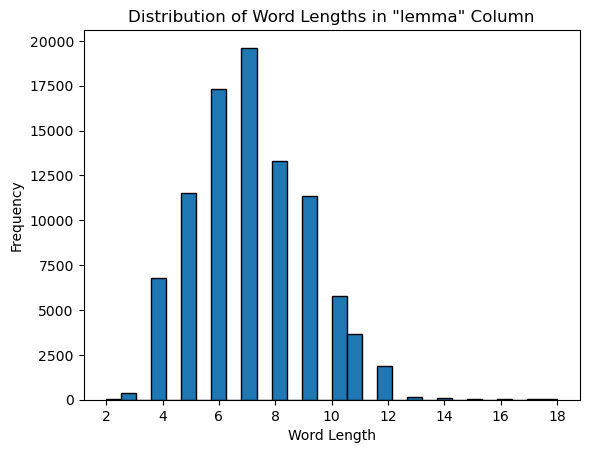

In [5]:
um['lemma_length'] = um['lemma'].str.len()
plt.hist(um['lemma_length'], bins=30, edgecolor='black')
plt.title('Distribution of Word Lengths in "lemma" Column')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

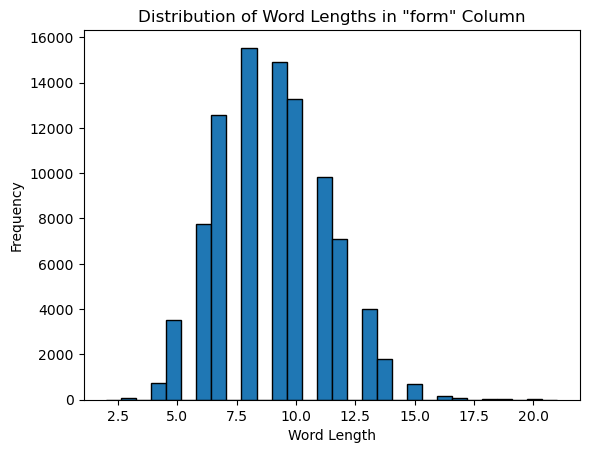

In [6]:
# Visualize the distribution of word lengths in the 'form' column with a histogram
import matplotlib.pyplot as plt

um['form_length'] = um['form'].str.len()
plt.hist(um['form_length'], bins=30, edgecolor='black')
plt.title('Distribution of Word Lengths in "form" Column')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Filter for verbs
um = um[um.tag.str.contains(r'^V;', na=False)]

In [8]:
# check if all tags start with V;
print("num of tags that do not start with V: " + str(um.tag[~um.tag.str.contains(r'^V;')].shape[0]))

num of tags that do not start with V: 0


In [9]:
# function to check for any latin characters
def contains_latin(text):
    if re.search(r'[a-zA-Z]', text):
        return True
    else:
        return False

In [10]:
# check lemma and form for latin characters
if um['lemma'].apply(contains_latin).any():
    print("There are latin characters in the lemma column")
else:
    print("No latin characters in the lemma column")
if um['form'].apply(contains_latin).any():
    print("There are latin characters in the form column")
else:
    print("No latin characters in the form column")

No latin characters in the lemma column
There are latin characters in the form column


In [11]:
# check which latin characters are present in the form column
def find_latin(text):
    return re.findall(r'[a-zA-Z]', text)
all_latin = um['form'].apply(find_latin).explode().dropna().unique()
print(f"Latin characters in the form column: {all_latin}")

Latin characters in the form column: ['a']


In [12]:
# Identify and correct rows where Latin 'a' appears in the 'form' column and replace it with Georgian 'ა'
um['form'] = um['form'].apply(
    lambda x: x.replace('a', 'ა') if re.search(r'[a-zA-Z]', x) else x
)

In [13]:
# check for any remaining Latin 'a's
if um['form'].str.contains('a').any():
    print("There are still Latin 'a's in the target column.")
else:
    print("No Latin 'a's in the target column.")

No Latin 'a's in the target column.


In [14]:
# split into features and target 
um_features = um.drop(columns=['form'])
um_target = um['form']

In [15]:
# Identify and correct rows where Latin 'a' appears in the 'form' column
um_target = um_target.apply(
    lambda x: x.replace('a', 'ა') if re.search(r'[a-zA-Z]', x) else x
)

In [16]:
# check for any remaining Latin 'a's
if um_target.str.contains('a').any():
    print("There are still Latin 'a's in the form column.")
else:
    print("No Latin 'a's found in the form column.")

No Latin 'a's found in the form column.


In [17]:
# save the cleaned data
um_features.to_csv(r"..\data\um_features.csv", index=False)
um_target.to_csv(r"..\data\um_target.csv", index=False)